## Detailed article explaination

The detailed code explanation for this article is available at the following link:

https://www.daniweb.com/programming/computer-science/tutorials/541076/chatbot-development-using-transformers-in-tensorflow-keras

For my other articles for Daniweb.com, please see this link:

https://www.daniweb.com/members/1235222/usmanmalik57

In [1]:
import pandas as pd
import random
import string
import re
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers import TextVectorization

## Importing the Dataset

In [2]:
## link to the dataset
## https://www.kaggle.com/datasets/kreeshrajani/3k-conversations-dataset-for-chatbot


conversations = pd.read_csv("/content/Conversation.csv")
print(conversations.shape)
conversations.head()

(3725, 3)


,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [3]:
text_pairs = []

for index, row in conversations.iterrows():
    question = row['question']
    answer =  "[start] " + row['answer'] + " [end]"
    text_pairs.append((question, answer))

for _ in range(5):
    print(random.choice(text_pairs))

("a blind date doesn't mean that she is blind!", '[start] what does it mean? [end]')
("i don't have money or a new car.", '[start] me, neither. [end]')
('i feel sorry for you.', '[start] i have only a few friends. [end]')
("yes, but it isn't a fast-food restaurant, is it?", "[start] it's the slowest hamburger in town. [end]")
('is it easy to learn?', '[start] yes, it will only take about 30 minutes. [end]')


In [4]:
random.shuffle(text_pairs)
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} total pairs")
print(f"{len(train_pairs)} training pairs")
print(f"{len(val_pairs)} validation pairs")
print(f"{len(test_pairs)} test pairs")

3725 total pairs
2609 training pairs
558 validation pairs
558 test pairs


## Preprocessing Texts

In [5]:
strip_chars = string.punctuation
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

vocab_size = 2500
sequence_length = 100
batch_size = 64

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(lowercase, "[%s]" % re.escape(strip_chars), "")

question_vectorizer = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)

answer_vectorizer = TextVectorization(
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length + 1,
    standardize=custom_standardization
)

question_texts = [pair[0] for pair in train_pairs]
answer_texts = [pair[1] for pair in train_pairs]

question_vectorizer.adapt(question_texts)
answer_vectorizer.adapt(answer_texts)

In [6]:
print(len(question_vectorizer.get_vocabulary()))
question_vectorizer.get_vocabulary()

2072


['',
 '[UNK]',
 'i',
 'you',
 'the',
 'to',
 'a',
 'it',
 'that',
 'do',
 'what',
 'is',
 'of',
 'and',
 'are',
 'have',
 'in',
 'its',
 'they',
 'my',
 'like',
 'did',
 'was',
 'im',
 'so',
 'for',
 'he',
 'dont',
 'yes',
 'be',
 'but',
 'no',
 'me',
 'thats',
 'on',
 'about',
 'we',
 'too',
 'not',
 'why',
 'go',
 'how',
 'think',
 'with',
 'your',
 'going',
 'want',
 'this',
 'will',
 'well',
 'really',
 'know',
 'good',
 'get',
 'at',
 'there',
 'one',
 'just',
 'can',
 'ill',
 'would',
 'all',
 'whats',
 'then',
 'see',
 'youre',
 'money',
 'didnt',
 'nice',
 'if',
 'time',
 'people',
 'should',
 'need',
 'right',
 'out',
 'oh',
 'had',
 'much',
 'her',
 'sure',
 'school',
 'new',
 'got',
 'up',
 'or',
 'mean',
 'maybe',
 'ive',
 'them',
 'she',
 'lot',
 'look',
 'him',
 'from',
 'does',
 'course',
 'cant',
 'who',
 'when',
 'say',
 'our',
 'only',
 'been',
 'day',
 'because',
 'today',
 'great',
 'an',
 'were',
 'take',
 'more',
 'okay',
 'make',
 'every',
 'where',
 'their',
 's

In [23]:
example_text = tf.constant("well, they do put their party before their nation.")
example_text_tokens = question_vectorizer(example_text)
example_text_tokens

<tf.Tensor: shape=(100,), dtype=int64, numpy=
array([ 49,  18,   9, 155, 116, 156, 257, 116, 676,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0])>

In [24]:
question_vocab = np.array(question_vectorizer.get_vocabulary())
tokens = question_vocab[example_text_tokens.numpy()]
' '.join(tokens)

'well they do put their party before their nation                                                                                           '

In [9]:
example_text = tf.constant("[start] yes. i think when you get old, you begin to smell. [end]")
example_text_tokens = answer_vectorizer(example_text)
print(example_text_tokens)

answer_vocab = np.array(answer_vectorizer.get_vocabulary())
tokens = answer_vocab[example_text_tokens.numpy()]
print(' '.join(tokens))

tf.Tensor(
[   2   22    4   42   87    5   49  136    5 2023    7  301    3    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0], shape=(101,), dtype=int64)
[start] yes i think when you get old you begin to smell [end]                                                                                        


In [10]:
def format_dataset(question, answers):
    questions = question_vectorizer(question)
    answers = answer_vectorizer(answers)
    return (
        {
            "encoder_inputs": questions,
            "decoder_inputs": answers[:, :-1],
        },
        answers[:, 1:],
    )


def make_dataset(pairs):
    questions, answers = zip(*pairs)
    questions = list(questions)
    answers = list(answers)
    dataset = tf.data.Dataset.from_tensor_slices((questions, answers))
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(format_dataset)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [27]:
for item in train_ds.take(1):
    # print(f"Encoder input tokens: {item[0]['encoder_inputs'][0].numpy()}")
    print(f"Encoder input text: {question_vocab[item[0]['encoder_inputs'][0].numpy()]}")

    # print(f"Decoder input tokens: {item[0]['decoder_inputs'][0].numpy()}")
    print(f"Decoder input text: {answer_vocab[item[0]['decoder_inputs'][0].numpy()]}")

    # print(f"Decoder outputs tokens: {item[1][0].numpy()}")
    print(f"Decoder outputs: {answer_vocab[item[1][0].numpy()]}")



Encoder input text: ['all' 'they' 'think' 'about' 'is' 'themselves' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '']
Decoder input text: ['[start]' 'maybe' 'we' 'should' 'get' 'rid' 'of' 'him' '[end]' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '']
Decoder outputs: ['maybe' 'we' 'should' 'get' 'rid' 'of' 'him' '[end]' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''

In [12]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 100)
inputs["decoder_inputs"].shape: (64, 100)
targets.shape: (64, 100)


## Transformer Encoder

In [13]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        attention_output = self.attention(query=inputs, value=inputs, key=inputs)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)




## Positional Embeddings

In [31]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        # print(positions)
        embedded_tokens = self.token_embeddings(inputs)
        # print(f"tokens_embeddings: {embedded_tokens.shape}")
        embedded_positions = self.position_embeddings(positions)
        # print(f"position_embeddings: {embedded_positions.shape}")
        return embedded_tokens + embedded_positions


    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)



In [32]:

# Define parameters
batch_size = 64
sequence_length = 100
embed_dim = 256

# Create dummy data

for inputs, targets in train_ds.take(1):
  dummy_inputs = inputs["encoder_inputs"]


print("Input shape:", dummy_inputs.shape)

# Instantiate the PositionalEmbedding layer
positional_embedding_layer = PositionalEmbedding(sequence_length, vocab_size, embed_dim)

# Pass the dummy data through the layer
output_embeddings = positional_embedding_layer(dummy_inputs)

# Print shapes
print("Output embeddings shape:", output_embeddings.shape)


Input shape: (64, 100)
Output embeddings shape: (64, 100, 256)


In [16]:
latent_dim = 2048
num_heads = 8  # You can adjust this based on your needs

# Instantiate the TransformerEncoder layer
transformer_encoder = TransformerEncoder(embed_dim=embed_dim, dense_dim=latent_dim, num_heads=num_heads)

# Pass the dummy data through the layer
encoder_outputs = transformer_encoder(output_embeddings)

# Print the shapes of input and output
print("Input shape:", encoder_outputs.shape)
print("Output shape:", encoder_outputs.shape)

Input shape: (64, 100, 256)
Output shape: (64, 100, 256)


## Transformer Decoder

In [17]:

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(latent_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.add = layers.Add()  # instead of `+` to preserve mask
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, use_causal_mask=True
        )
        out_1 = self.layernorm_1(self.add([inputs, attention_output_1]))

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
        )
        out_2 = self.layernorm_2(self.add([out_1, attention_output_2]))

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(self.add([out_2, proj_output]))



In [18]:
transformer_decoder = TransformerEncoder(embed_dim=embed_dim, dense_dim=latent_dim, num_heads=num_heads)

for inputs, targets in train_ds.take(1):
  decoder_inputs = inputs["decoder_inputs"]

decoder_inputs = positional_embedding_layer(decoder_inputs)

decoder_outputs = transformer_decoder(decoder_inputs, encoder_outputs)

# Print the shapes of input and output
print("Encoder input shape:", encoder_outputs.shape)
print("Decoder inputs shape:", decoder_inputs.shape)
print("Decoder outputs shape:", decoder_outputs.shape)

Encoder input shape: (64, 100, 256)
Decoder inputs shape: (64, 100, 256)
Decoder outputs shape: (64, 100, 256)


## Putting Everything Together and Training the Chatbot Model

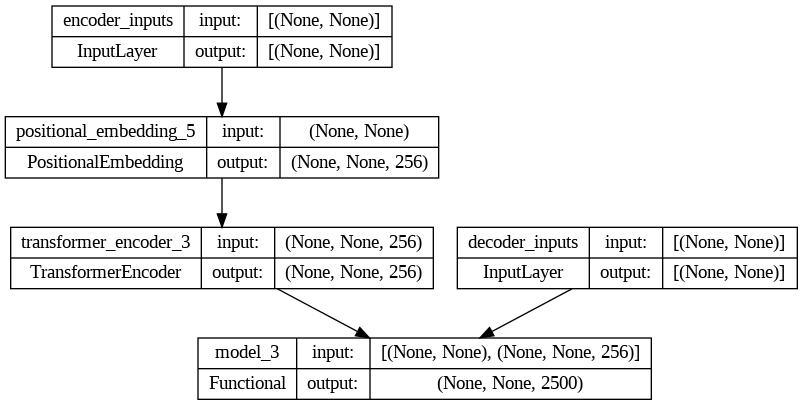

In [34]:
embed_dim = 256
latent_dim = 2048
num_heads = 8

encoder_inputs = keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, latent_dim, num_heads)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(None, embed_dim), name="decoder_state_inputs")
x = PositionalEmbedding(sequence_length, vocab_size, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, encoder_outputs])
transformer = keras.Model(
    [encoder_inputs, decoder_inputs], decoder_outputs, name="transformer"
)


transformer.compile(
    "rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)


tf.keras.utils.plot_model(transformer, show_shapes=True)



In [20]:
epochs = 50

transformer.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
41/41 [==============================] - 14s 195ms/step - loss: 5.3283 - accuracy: 0.2328 - val_loss: 4.5596 - val_accuracy: 0.2912
Epoch 2/50
41/41 [==============================] - 6s 158ms/step - loss: 4.4595 - accuracy: 0.2942 - val_loss: 4.3027 - val_accuracy: 0.3102
Epoch 3/50
41/41 [==============================] - 7s 159ms/step - loss: 4.1280 - accuracy: 0.3126 - val_loss: 4.1890 - val_accuracy: 0.3160
Epoch 4/50
41/41 [==============================] - 7s 161ms/step - loss: 3.8704 - accuracy: 0.3247 - val_loss: 4.1176 - val_accuracy: 0.3195
Epoch 5/50
41/41 [==============================] - 7s 162ms/step - loss: 3.6861 - accuracy: 0.3376 - val_loss: 4.0556 - val_accuracy: 0.3227
Epoch 6/50
41/41 [==============================] - 7s 163ms/step - loss: 3.5039 - accuracy: 0.3531 - val_loss: 4.0836 - val_accuracy: 0.3255
Epoch 7/50
41/41 [==============================] - 7s 165ms/step - loss: 3.3373 - accuracy: 0.3682 - val_loss: 4.0827 - val_accuracy: 0.3141
Epoch

## Testing the Chatbot

In [21]:
answer_index_lookup = dict(zip(range(len(answer_vocab)), answer_vocab))

max_decoded_sentence_length = 100


def decode_sequence(input_sentence):
    tokenized_input_sentence = question_vectorizer([input_sentence])
    decoded_sentence = "[start]"
    for i in range(max_decoded_sentence_length):
        tokenized_target_sentence = answer_vectorizer([decoded_sentence])[:, :-1]
        predictions = transformer([tokenized_input_sentence, tokenized_target_sentence])

        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = answer_index_lookup[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token == "[end]":
            break
    return decoded_sentence



test_eng_texts = [pair[0] for pair in train_pairs]
for _ in range(10):
    question = random.choice(test_eng_texts)
    print(f"Q: {question}")
    answer = decode_sequence(question)
    print(f"A: {answer}")


Q: what kinds of things do you like to do?
A: [start] ive always liked to draw and paint [end]
Q: well, it won't last forever.
A: [start] no i figure ill finish it all by next week [end]
Q: have you heard something that you're not telling me?
A: [start] what do you mean [end]
Q: every so often, i do.
A: [start] did you always know how to draw and paint [end]
Q: so, will you be at school tomorrow?
A: [start] no i want to the movies instead [end]
Q: well, i can always pull over.
A: [start] no thank you ill just wait [end]
Q: no one believes that the crime rate is going down.
A: [start] maybe the mayor is just talking about his own neighborhood [end]
Q: get better.
A: [start] thanks a lot [end]
Q: they should find a nice hobby.
A: [start] just wait until youre 50 years old [end]
Q: once every two months.
A: [start] thats a lot [end]


In [22]:
# sentences = ["Hello how are you?",
#              "I am planning to quit this job.",
#              "What about you? Are you going for a dinner?",
#              "Do you like pizza?"]

# for input_sentence in sentences:
#     print(f"Q: {input_sentence}")
#     translated = decode_sequence(input_sentence)
#     print(f"A: {translated}")